In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


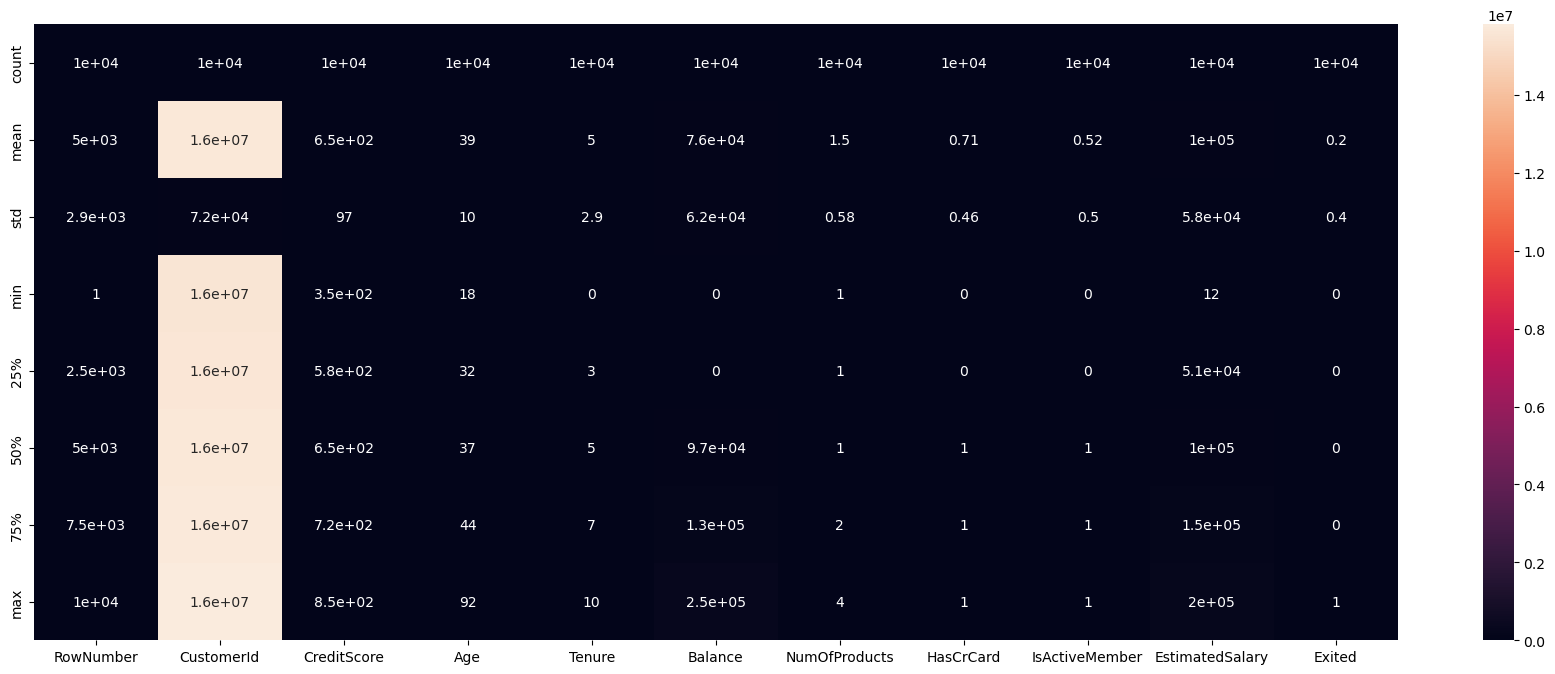

In [6]:
plt.figure(figsize= (22,8))
sns.heatmap(df.describe(), annot = True)
plt.show()

In [7]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

# EDA

In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [11]:
df['Surname'].value_counts()

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64

In [12]:
df['CreditScore'].max()

850

In [13]:
df['CreditScore'].min()

350

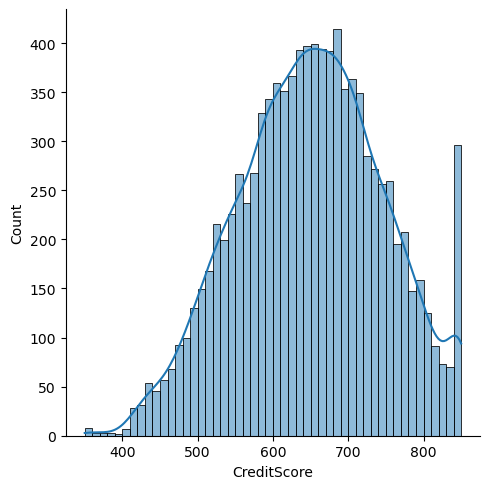

In [14]:
sns.displot(df['CreditScore'],bins=50, kde= True)
plt.show()

In [15]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

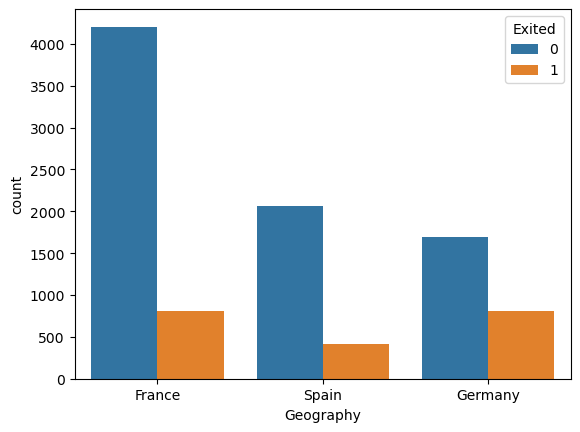

In [16]:
sns.countplot(x = 'Geography', data = df, hue = 'Exited')
plt.show()

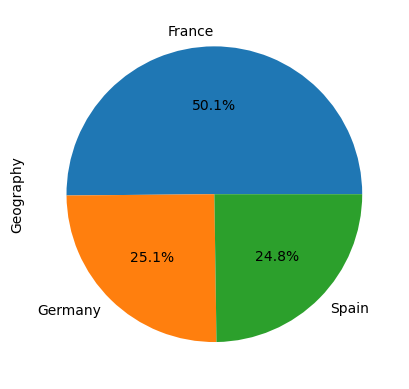

In [17]:
df['Geography'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
plt.show()

In [18]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

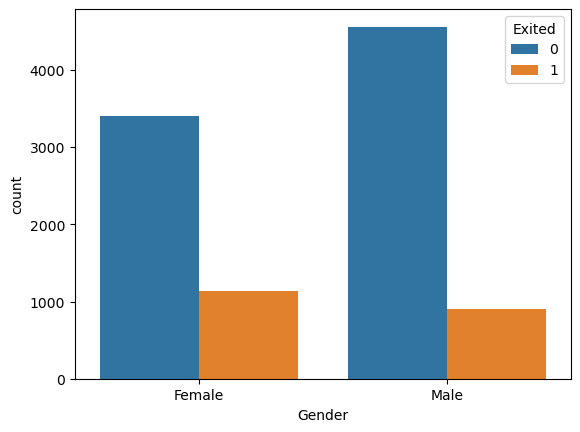

In [19]:
sns.countplot(x = 'Gender', data = df, hue = 'Exited')
plt.show()

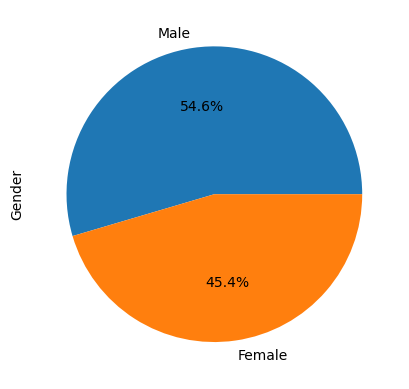

In [20]:
df['Gender'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
plt.show()

In [21]:
df['Age'].max()

92

In [22]:
df['Age'].min()

18

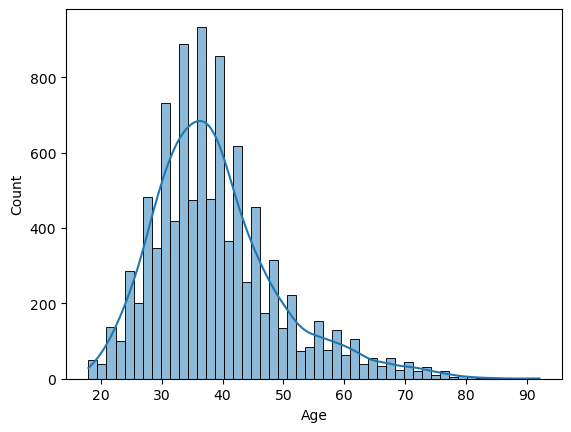

In [23]:
sns.histplot(df['Age'],bins = 50, kde = True)
plt.show()

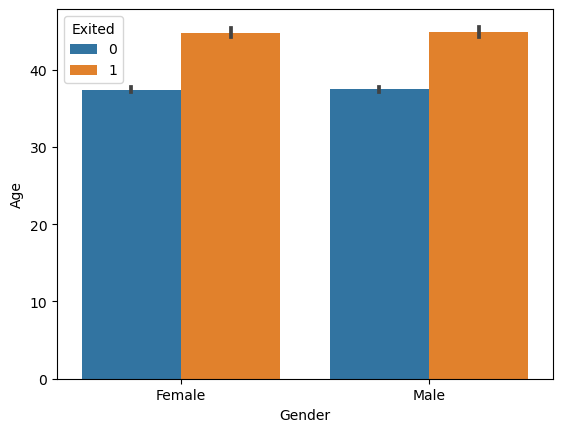

In [24]:
sns.barplot(x = 'Gender', y = 'Age', data = df, hue = 'Exited')
plt.show()

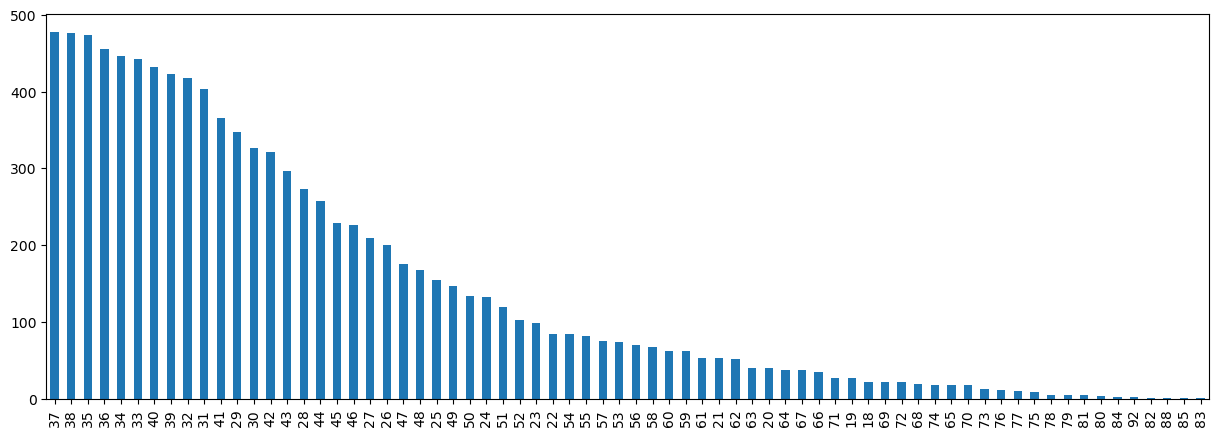

In [25]:
plt.figure(figsize= (15,5))
df['Age'].value_counts().plot(kind = 'bar')
plt.show()

In [26]:
df['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

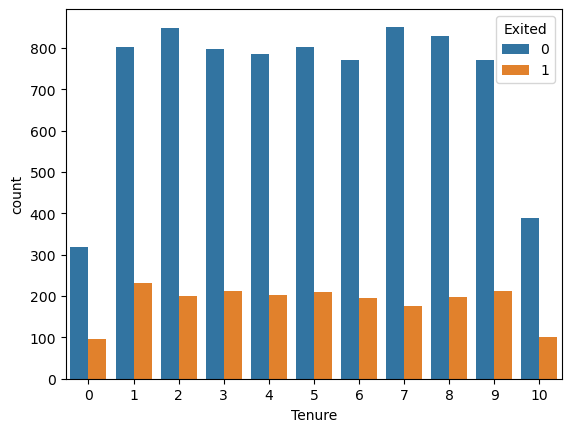

In [27]:
sns.countplot(x = 'Tenure', data = df, hue = 'Exited')
plt.show()

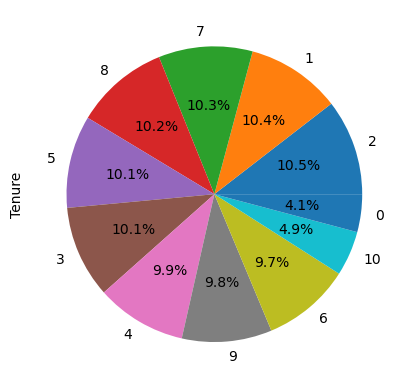

In [28]:
df['Tenure'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
plt.show()

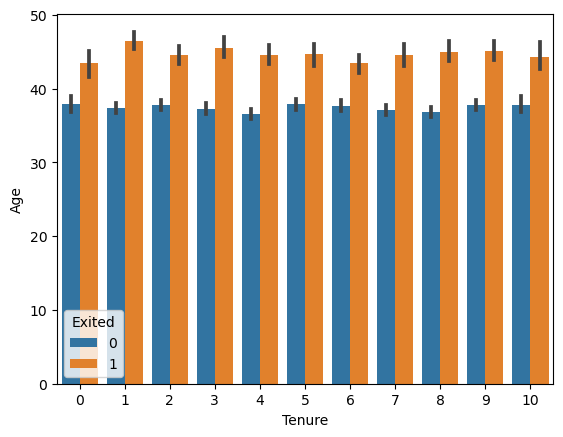

In [29]:
sns.barplot(x = 'Tenure', y = 'Age', data = df, hue = 'Exited')
plt.show()

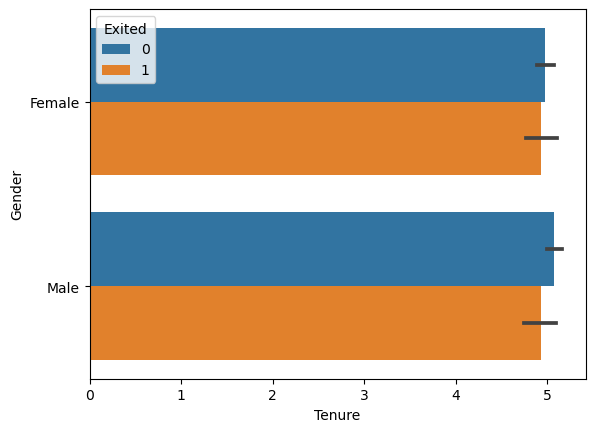

In [30]:
sns.barplot(x = 'Tenure', y = 'Gender', data = df, hue = 'Exited')
plt.show()

In [31]:
df['Balance'].max()

250898.09

In [32]:
df['Balance'].min()

0.0

In [33]:
df['Balance'].mean()

76485.889288

<Axes: xlabel='Gender', ylabel='Balance'>

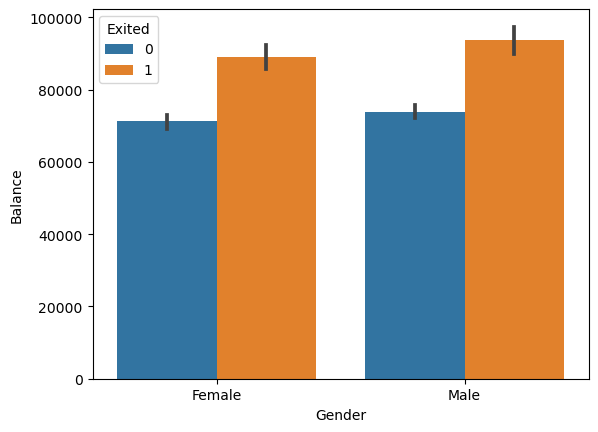

In [34]:
sns.barplot(x = 'Gender', y = 'Balance', data = df, hue = 'Exited')

In [35]:
df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

<Axes: xlabel='NumOfProducts', ylabel='count'>

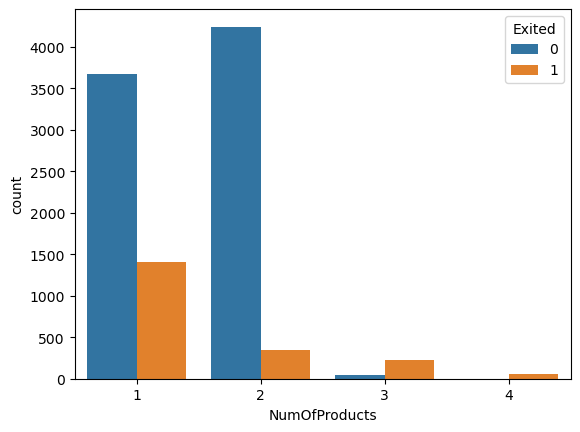

In [36]:
sns.countplot(x = 'NumOfProducts', data = df , hue = 'Exited')

<Axes: ylabel='NumOfProducts'>

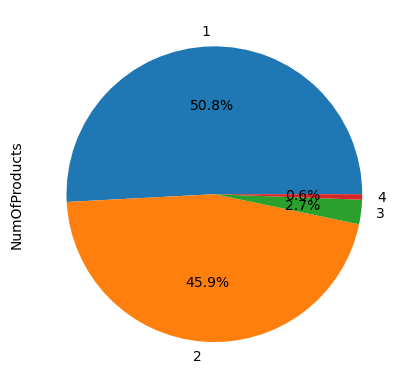

In [37]:
df['NumOfProducts'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

In [38]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

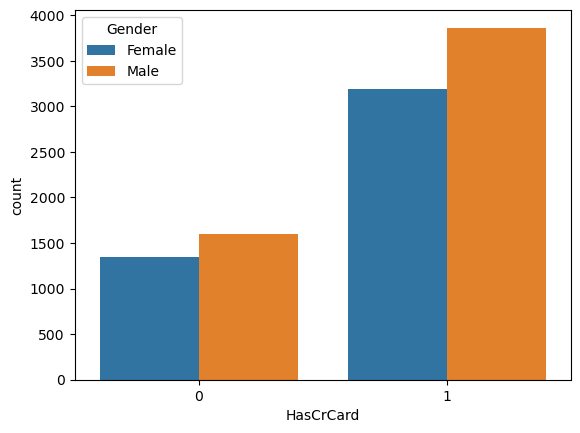

In [39]:
sns.countplot(x ='HasCrCard', data = df, hue = 'Gender')
plt.show()

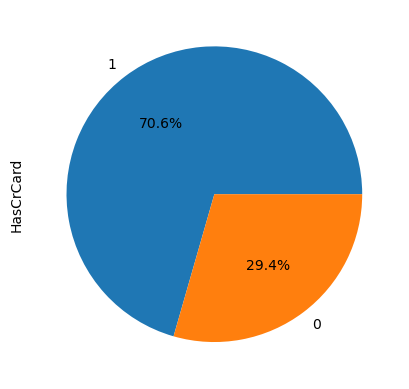

In [40]:
df['HasCrCard'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
plt.show()

In [41]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

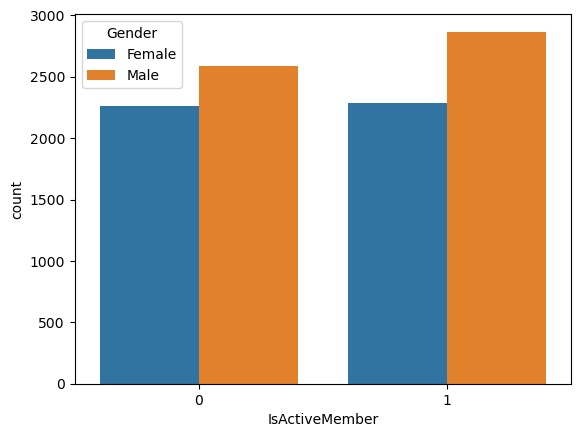

In [42]:
sns.countplot(x ='IsActiveMember', data = df, hue = 'Gender')
plt.show()

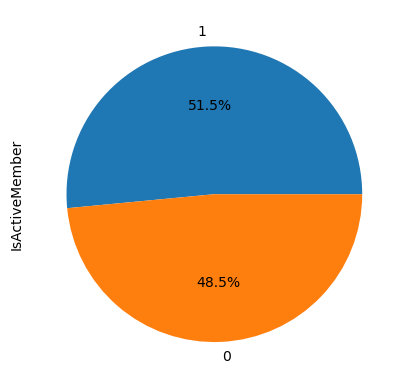

In [43]:
df['IsActiveMember'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
plt.show()

In [44]:
df['EstimatedSalary'].min()

11.58

In [45]:
df['EstimatedSalary'].max()

199992.48

In [46]:
df['EstimatedSalary'].mean()

100090.239881

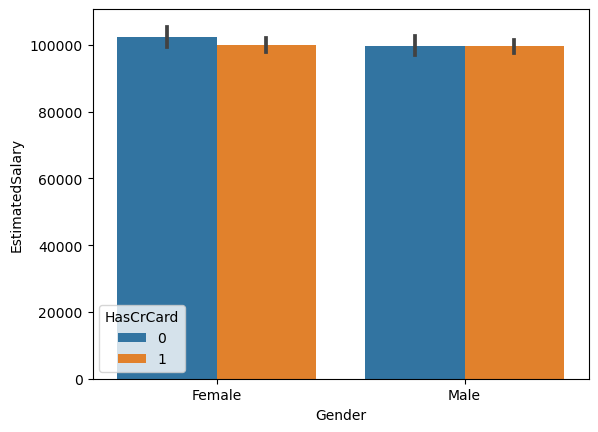

In [47]:
sns.barplot(x = 'Gender', y = 'EstimatedSalary', data = df, hue = 'HasCrCard')
plt.show()

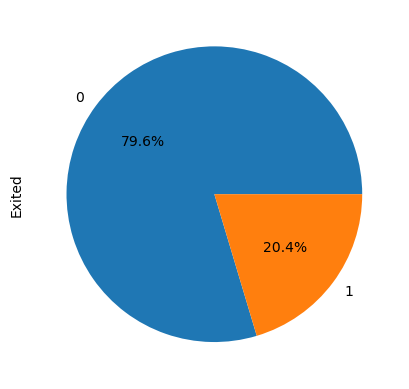

In [48]:
df['Exited'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
plt.show()

In [49]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [50]:
df.drop(columns= ['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [51]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
le = LabelEncoder()

In [54]:
# Converting categorical variables into numerical format

df['NumOfProducts'] = le.fit_transform(df['NumOfProducts']) 
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

In [55]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,0,1,1,101348.88,1
1,608,2,0,41,1,83807.86,0,0,1,112542.58,0
2,502,0,0,42,8,159660.80,2,1,0,113931.57,1
3,699,0,0,39,1,0.00,1,0,0,93826.63,0
4,850,2,0,43,2,125510.82,0,1,1,79084.10,0


# Model Building

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score

In [57]:
X = df.drop(columns=['Exited'])

In [58]:
y = df['Exited']


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [60]:
model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3 = GradientBoostingClassifier()

In [61]:
def model_train(model, X_train, y_train, X_test, y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print('R2 Score: ',r2_score(y_test,y_pred))

# LogisticRegression

In [62]:
model_train(model1, X_train, y_train, X_test, y_test)

Accuracy Score:  0.8005
R2 Score:  -0.26355591234912157


# RandomForestClassifier

In [63]:
model_train(model2, X_train, y_train, X_test, y_test)

Accuracy Score:  0.8665
R2 Score:  0.1544625849693848


# GradientBoostingClassifier

In [64]:
model_train(model3, X_train, y_train, X_test, y_test)

Accuracy Score:  0.866
R2 Score:  0.1512957781715173


# Hypertuning 

In [65]:
model4 = GradientBoostingClassifier(n_estimators=90,
                                   subsample=1,
                                   max_depth=4)



In [66]:
model_train(model4, X_train, y_train, X_test, y_test)

Accuracy Score:  0.87
R2 Score:  0.1766302325544571


In [67]:
model5 = RandomForestClassifier(n_estimators=100,
                               criterion= 'entropy')

In [68]:
model_train(model5, X_train, y_train, X_test, y_test)

Accuracy Score:  0.862
R2 Score:  0.1259613237885775


# Conclusion

* Here the Gradient Boosting Classifier gives us slightly High Accuracy Score for prediction.